#1. 데이터 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_in = pd.read_csv('train_features.csv')
train_out = pd.read_csv('train_target.csv')

In [4]:
test_in = pd.read_csv('test_features.csv')

#2. 데이터 관찰 및 분할

In [ ]:
train_in.head()

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


In [ ]:
train_out.head()

,id,X,Y,M,V
0,0,0.0,-400.0,50.0,0.4
1,1,400.0,0.0,100.0,1.0
2,2,-300.0,-200.0,25.0,0.4
3,3,200.0,-100.0,150.0,0.4
4,4,-300.0,-100.0,150.0,0.4


In [ ]:
train_out.describe()

,id,X,Y,M,V
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1399.500000,0.000000,-5.000000,100.000000,0.600000
std,808.434702,259.854028,255.926537,50.008931,0.282893
min,0.000000,-400.000000,-400.000000,25.000000,0.200000
25%,699.750000,-200.000000,-200.000000,50.000000,0.400000
50%,1399.500000,0.000000,0.000000,100.000000,0.600000
75%,2099.250000,200.000000,200.000000,150.000000,0.800000
max,2799.000000,400.000000,400.000000,175.000000,1.000000


In [ ]:
train_in.isnull().sum(), train_out.isnull().sum()

(id      0
 Time    0
 S1      0
 S2      0
 S3      0
 S4      0
 dtype: int64, id    0
 X     0
 Y     0
 M     0
 V     0
 dtype: int64)

In [11]:
train_coor_out = train_out[['X', 'Y']]
train_mass_out = train_out['M']
train_vel_out = train_out['V']

In [ ]:
train_coor_out

,X,Y
0,0.0,-400.0
1,400.0,0.0
2,-300.0,-200.0
3,200.0,-100.0
4,-300.0,-100.0
...,...,...
2795,200.0,200.0
2796,-400.0,-400.0
2797,-100.0,0.0
2798,100.0,100.0


In [ ]:
train_in['id'].size

1050000

##2.1 초기 시간 전처리

진동이 시작되는 가속도 크기의 threshold는 10^-6으로 설정한다.

In [ ]:
prime_time = pd.DataFrame(data=None, columns=[['id', 's1', 's2', 's3', 's4']], dtype='int32')

i=0
j, t1, t2, t3, t4 = 0, 0, 0, 0, 0
while i<train_in['id'].size:
  if t1==0 and abs(train_in['S1'][i])>0.000001:
    t1=train_in['Time'][i]
  if t2==0 and abs(train_in['S2'][i])>0.000001:
    t2=train_in['Time'][i]
  if t3==0 and abs(train_in['S3'][i])>0.000001:
    t3=train_in['Time'][i]
  if t4==0 and abs(train_in['S4'][i])>0.000001:
    t4=train_in['Time'][i]
  #print(t1, t2, t3, t4)
  i=i+1
  if t1>0 and t2>0 and t3>0 and t4>0:
    prime_time.loc[j]=[j, t1, t2, t3, t4]
    j=j+1
    t1, t2, t3, t4 = 0, 0, 0, 0
    while i<train_in['id'].size and train_in['id'][i]<j:
      i=i+1

In [ ]:
def p_time(data):
  prime = pd.DataFrame(columns=[['id', 's1', 's2', 's3', 's4']])

  i, j, t1, t2, t3, t4 = 0, data['id'][0], 0, 0, 0, 0

  while i<data['id'].size:
    if t1==0 and abs(data['S1'][i])>0.000001:
      t1=data['Time'][i]
    if t2==0 and abs(data['S2'][i])>0.000001:
     t2=data['Time'][i]
    if t3==0 and abs(data['S3'][i])>0.000001:
      t3=data['Time'][i]
    if t4==0 and abs(data['S4'][i])>0.000001:
      t4=data['Time'][i]
    #print(t1, t2, t3, t4)
    i=i+1
    if t1>0 and t2>0 and t3>0 and t4>0:
      prime.loc[j]=[j, t1, t2, t3, t4]
      j=j+1
      t1, t2, t3, t4 = 0, 0, 0, 0
      while i<data['id'].size and data['id'][i]<j:
        i=i+1

  return prime  

In [ ]:
prime_time=prime_time[['s1', 's2', 's3', 's4']]
prime_time

,s1,s2,s3,s4
0,0.000044,0.000044,0.000120,0.000092
1,0.000112,0.000024,0.000072,0.000056
2,0.000016,0.000096,0.000096,0.000072
3,0.000084,0.000036,0.000084,0.000052
4,0.000024,0.000096,0.000084,0.000060
...,...,...,...,...
2795,0.000096,0.000056,0.000036,0.000020
2796,0.000008,0.000112,0.000136,0.000108
2797,0.000052,0.000076,0.000060,0.000036
2798,0.000080,0.000060,0.000044,0.000024


In [ ]:
prime_time.to_csv('prime_time.csv')

In [6]:
prime_time = pd.read_csv('prime_time.csv')
prime_time.describe()

,Unnamed: 0,s1,s2,s3,s4
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1399.500000,0.000069,0.000069,0.000071,0.000048
std,808.434702,0.000035,0.000035,0.000034,0.000028
min,0.000000,0.000004,0.000004,0.000012,0.000004
25%,699.750000,0.000040,0.000040,0.000040,0.000024
50%,1399.500000,0.000072,0.000072,0.000068,0.000044
75%,2099.250000,0.000096,0.000096,0.000100,0.000072
max,2799.000000,0.000148,0.000148,0.000136,0.000108


In [ ]:
prime_time.columns

Index(['Unnamed: 0', 's1', 's2', 's3', 's4'], dtype='object')

In [7]:
prime_time = prime_time.drop('Unnamed: 0', axis=1)

In [8]:
prime_time

,s1,s2,s3,s4
0,0.000044,0.000044,0.000120,0.000092
1,0.000112,0.000024,0.000072,0.000056
2,0.000016,0.000096,0.000096,0.000072
3,0.000084,0.000036,0.000084,0.000052
4,0.000024,0.000096,0.000084,0.000060
...,...,...,...,...
2795,0.000096,0.000056,0.000036,0.000020
2796,0.000008,0.000112,0.000136,0.000108
2797,0.000052,0.000076,0.000060,0.000036
2798,0.000080,0.000060,0.000044,0.000024


1번 센서와 2번 센서는 원점 (0, 0)에 대해 대칭적 분포를 이루고 있음을 추정

##2.2 초기 시간 데이터 가공 

거리는 시간 역수에 비례, 속도는 상대적인 데이터로부터 추정

In [ ]:
prime_dist = prime_time
for i in range(prime_dist['s1'].size):
  prime_dist['s1'][i] = 1/prime_dist['s1'][i]/20000
  prime_dist['s2'][i] = 1/prime_dist['s2'][i]/20000
  prime_dist['s3'][i] = 1/prime_dist['s3'][i]/20000
  prime_dist['s4'][i] = 1/prime_dist['s4'][i]/20000

prime_dist.describe()

,s1,s2,s3,s4
count,2800.000000,2800.000000,2800.000000,2800.000000
mean,1.255544,1.255544,0.973143,1.991237
std,1.672690,1.672690,0.661767,2.463904
min,0.337838,0.337838,0.367647,0.462963
25%,0.520833,0.520833,0.500000,0.694444
50%,0.694444,0.694444,0.735294,1.136364
75%,1.250000,1.250000,1.250000,2.083333
max,12.500000,12.500000,4.166667,12.500000


In [ ]:
prime_dist.to_csv('prime_dist.csv')

In [20]:
prime_dist = pd.read_csv('prime_dist.csv')
prime_dist = prime_dist.drop('Unnamed: 0', axis=1)
prime_dist

,s1,s2,s3,s4
0,1.136364,1.136364,0.416667,0.543478
1,0.446429,2.083333,0.694444,0.892857
2,3.125000,0.520833,0.520833,0.694444
3,0.595238,1.388889,0.595238,0.961538
4,2.083333,0.520833,0.595238,0.833333
...,...,...,...,...
2795,0.520833,0.892857,1.388889,2.500000
2796,6.250000,0.446429,0.367647,0.462963
2797,0.961538,0.657895,0.833333,1.388889
2798,0.625000,0.833333,1.136364,2.083333


##2.3 순차적 진동 데이터

In [21]:
l = train_in.iloc[-1, 0]-train_in.iloc[0, 0]+1
t = train_in.reset_index(drop=True).drop(['id', 'Time'], axis=1)
t = t.values
seq_in = t.reshape(l, 375, 4, 1)
seq_in

array([[[[ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00]],

        [[ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00]],

        [[ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00]],

        ...,

        [[-6.375595e+04],
         [-6.375595e+04],
         [-2.527030e+04],
         [ 3.015649e+03]],

        [[-6.302044e+04],
         [-6.302044e+04],
         [-6.590466e+04],
         [-4.979514e+04]],

        [[-6.180807e+04],
         [-6.180807e+04],
         [-1.023292e+05],
         [-9.568736e+04]]],


       [[[ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00]],

        [[ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00]],

        [[ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00],
         [ 0.000000e+00]],

        ...,

        [[ 1.069

In [22]:
ll = test_in.iloc[-1, 0]-test_in.iloc[0, 0]+1
tt = test_in.reset_index(drop=True).drop(['id', 'Time'], axis=1)
tt = tt.values
seq_test = tt.reshape(ll, 375, 4, 1)

In [23]:
train_mass_out, train_vel_out

(0        50.0
 1       100.0
 2        25.0
 3       150.0
 4       150.0
         ...  
 2795     50.0
 2796    150.0
 2797     50.0
 2798    125.0
 2799    100.0
 Name: M, Length: 2800, dtype: float64, 0       0.4
 1       1.0
 2       0.4
 3       0.4
 4       0.4
        ... 
 2795    1.0
 2796    0.2
 2797    0.2
 2798    0.6
 2799    0.6
 Name: V, Length: 2800, dtype: float64)

#3. 신경망 구성

In [24]:
from tensorflow import keras
import tensorflow as tf

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [26]:
from sklearn.model_selection import train_test_split

In [ ]:
d_train, d_test, coor_train, coor_test = train_test_split(prime_dist, train_coor_out, test_size=0.2)

In [27]:
#one = tf.cast(seq_in, dtype=tf.float32)
#two = tf.cast(train_mass_out, dtype=tf.float32)
#three = tf.cast(train_vel_out, dtype=tf.float32)

one = seq_in.astype('float32')
two = train_mass_out.astype('float32')
three = train_vel_out.astype('float32')

seqm_train, seqm_test, m_train, m_test = train_test_split(one, two, test_size=0.2)
seqv_train, seqv_test, v_train, v_test = train_test_split(one, three, test_size=0.2)

##3.1 좌표 신경망

In [ ]:
def dist_loss(coor_true, coor_pred):
  dif = coor_true - coor_pred
  dif = dif ** 2
  return tf.math.reduce_sum(dif)

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=4, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))

In [ ]:
model.compile(loss=dist_loss, optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 200)               10200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [ ]:
callback = EarlyStopping(monitor = 'loss', patience = 3)
hist = model.fit(d_train, coor_train, epochs=1000, batch_size=400, validation_split=0.2)

Train on 1792 samples, validate on 448 samples
Epoch 1/1000
1792/1792 [==============================] - 0s 18us/step - loss: 303154.7600 - val_loss: 84512.4727
Epoch 2/1000
1792/1792 [==============================] - 0s 14us/step - loss: 333134.0304 - val_loss: 83842.6978
Epoch 3/1000
1792/1792 [==============================] - 0s 12us/step - loss: 332479.9958 - val_loss: 103168.3269
Epoch 4/1000
1792/1792 [==============================] - 0s 13us/step - loss: 332839.3379 - val_loss: 86191.7317
Epoch 5/1000
1792/1792 [==============================] - 0s 12us/step - loss: 314916.1783 - val_loss: 69759.7042
Epoch 6/1000
1792/1792 [==============================] - 0s 15us/step - loss: 308503.1950 - val_loss: 84197.8697
Epoch 7/1000
1792/1792 [==============================] - 0s 15us/step - loss: 314997.9275 - val_loss: 78799.8666
Epoch 8/1000
1792/1792 [==============================] - 0s 13us/step - loss: 321611.7257 - val_loss: 62974.2482
Epoch 9/1000
1792/1792 [================

In [55]:
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model'+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

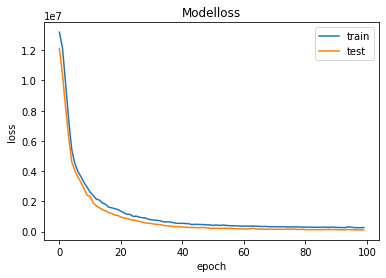

In [ ]:
modelplot(hist, 'loss', 'val_loss')

In [ ]:
coor_pred = model.predict(d_test)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(coor_pred, coor_test)
print(MSE)
print(dist_loss(coor_pred, coor_test))

69.37410665732901
tf.Tensor(77698.99945620852, shape=(), dtype=float64)


Epoch=100 / Batch=100 -> MSE = 131, Loss = 147747

Epoch=200 / Batch=200 -> MSE = 116, Loss = 130707

Epoch=400 / Batch=400 -> MSE = 87, Loss = 98376

Epoch=1000 / Batch=400 -> MSE = 69, Loss = 77698

In [ ]:
coor_pred, coor_test

(array([[-1.9563068e+02, -1.9868848e+02],
        [ 9.5847946e+01, -1.8082577e-01],
        [-3.8389465e+02,  3.8595377e+02],
        ...,
        [-1.0585126e+02, -4.0509619e+02],
        [ 9.4574265e+01, -2.0058659e+02],
        [ 1.8769806e+02, -2.1040079e+02]], dtype=float32),           X      Y
 2756 -200.0 -200.0
 2442  100.0    0.0
 1348 -400.0  400.0
 1749 -400.0 -400.0
 1788 -300.0 -300.0
 ...     ...    ...
 1685  300.0 -400.0
 2068  100.0    0.0
 2709 -100.0 -400.0
 1184  100.0 -200.0
 266   200.0 -200.0
 
 [560 rows x 2 columns])

##3.2 질량/속도 신경망

In [28]:
def mv_loss(mv_true, mv_pred):
  mv_true = tf.reshape(mv_true, [-1])
  mv_pred = tf.reshape(mv_pred, [-1])
  delta = mv_true - mv_pred
  error = delta / mv_true
  SE = error ** 2
  return tf.math.reduce_sum(SE)

In [31]:
callback = EarlyStopping(monitor = 'loss', patience = 7)

###3.2.1 질량

In [59]:
mmodel = Sequential()

mmodel.add(Conv2D(32, (5, 1), input_shape=seqm_train.shape[1:], dtype='float32'))
mmodel.add(Activation(tf.nn.tanh))
mmodel.add(Conv2D(64, (5, 1)))
mmodel.add(Activation(tf.nn.tanh))
mmodel.add(MaxPooling2D(pool_size=(5, 2)))
mmodel.add(Dropout(0.2))

mmodel.add(Conv2D(64, (5, 1)))
mmodel.add(LeakyReLU(0.3))
mmodel.add(Conv2D(32, (5, 1)))
mmodel.add(LeakyReLU(0.3))
mmodel.add(MaxPooling2D(pool_size=(5, 2)))
mmodel.add(Dropout(0.2))

mmodel.add(Flatten())
mmodel.add(Dense(64))
mmodel.add(LeakyReLU(0.3))
mmodel.add(Dense(1, activation='relu'))

mmodel.compile(loss=mv_loss, optimizer='adam')
mmodel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 371, 4, 32)        192       
_________________________________________________________________
activation_15 (Activation)   (None, 371, 4, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 367, 4, 64)        10304     
_________________________________________________________________
activation_16 (Activation)   (None, 367, 4, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 73, 2, 64)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 73, 2, 64)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 69, 2, 64)        

In [60]:
hist2 = mmodel.fit(seqm_train, m_train, validation_data=(seqm_test, m_test), epochs=100, batch_size=400, verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/100
 - 0s - loss: 277.5826 - val_loss: 123.7387
Epoch 2/100
 - 0s - loss: 160.2785 - val_loss: 129.2675
Epoch 3/100
 - 0s - loss: 146.4650 - val_loss: 124.7247
Epoch 4/100
 - 0s - loss: 136.3823 - val_loss: 113.9696
Epoch 5/100
 - 0s - loss: 131.2644 - val_loss: 113.8816
Epoch 6/100
 - 0s - loss: 123.6266 - val_loss: 100.8235
Epoch 7/100
 - 0s - loss: 111.2652 - val_loss: 97.3461
Epoch 8/100
 - 0s - loss: 101.8839 - val_loss: 84.6939
Epoch 9/100
 - 0s - loss: 91.7549 - val_loss: 83.6050
Epoch 10/100
 - 0s - loss: 86.0573 - val_loss: 69.6098
Epoch 11/100
 - 0s - loss: 74.4669 - val_loss: 59.9898
Epoch 12/100
 - 0s - loss: 67.0318 - val_loss: 54.5851
Epoch 13/100
 - 0s - loss: 63.5580 - val_loss: 51.4131
Epoch 14/100
 - 0s - loss: 61.3231 - val_loss: 50.6024
Epoch 15/100
 - 0s - loss: 60.1491 - val_loss: 52.1178
Epoch 16/100
 - 0s - loss: 58.7982 - val_loss: 47.3392
Epoch 17/100
 - 0s - loss: 51.9013 - val_loss: 44.9105
Epoch 18/100


POINT) ReLU 활성화함수를 사용한다면 Fail한다. ReLU의 경우 음수 구간에서 값/미분계수 모두 0을 유도하기 때문에 신경망이 발전하지 않아 0으로 실패할 가능성이 다분하고, 특히 신경망/데이터가 복잡한 경우 그러할 가능성이 높아진다. (AKA Dying ReLU Problem)

따라서, 음수 구간을 잘 처리해 줄 수 있는 활성화 함수를 사용해야 한다. ReLU보다 실패 가능성은 낮고, 활용 가능한 활성화 함수에는 LeakyReLU, tanh, sigmoid 등이 있는데, LeakyReLU를 0.3 이하로 사용했을 때에는 실패(LeakyReLU는 이론적인 부분에 비해 실제 성능이 좋지는 않다고 알려짐), tanh로 변경했을 경우 훈련이 정상적으로 진행되었다.

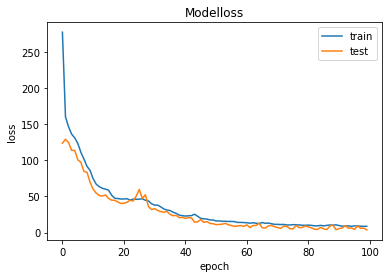

In [61]:
modelplot(hist2, 'loss', 'val_loss')

In [ ]:
m_test

2756     75.0
2442    175.0
1348     25.0
1749    125.0
1788     25.0
        ...  
1685     75.0
2068    175.0
2709     75.0
1184    150.0
266     150.0
Name: M, Length: 560, dtype: float32

In [35]:
m_pred = mmodel.predict(seqm_test)
print(mv_loss(m_test, m_pred))

tf.Tensor(9.164491, shape=(), dtype=float32)


Epoch 50 / Batch 200 -> loss:29.34 / earlystopped at 37

Epoch 50 / Batch 400 -> loss:10.32 / earlystopped at 29

Epoch 100 / Batch 400 / EarlyStop Patience 7 -> loss:9.16 / earlystopped at 93

###3.2.2 속도

In [44]:
vmodel = Sequential()

vmodel.add(Conv2D(32, (5, 1), input_shape=seqm_train.shape[1:], dtype='float32'))
vmodel.add(Activation(tf.nn.softmax))
#vmodel.add(Conv2D(64, (5, 1)))
#vmodel.add(Activation(tf.nn.softmax))
vmodel.add(MaxPooling2D(pool_size=(5, 2)))
vmodel.add(Dropout(0.2))

vmodel.add(Conv2D(64, (5, 1)))
vmodel.add(Activation(tf.nn.softmax))
#vmodel.add(Conv2D(32, (5, 1)))
#vmodel.add(Activation(tf.nn.softmax))
vmodel.add(MaxPooling2D(pool_size=(5, 2)))
vmodel.add(Dropout(0.2))

vmodel.add(Flatten())
vmodel.add(Dense(64))
#vmodel.add(LeakyReLU(0.1))
vmodel.add(Dense(1, activation='relu'))

vmodel.compile(loss=mv_loss, optimizer='adam')
vmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 371, 4, 32)        192       
_________________________________________________________________
activation_13 (Activation)   (None, 371, 4, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 2, 32)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 74, 2, 32)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 70, 2, 64)         10304     
_________________________________________________________________
activation_14 (Activation)   (None, 70, 2, 64)         0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 1, 64)        

In [49]:
hist3 = vmodel.fit(seqv_train, v_train, validation_data=(seqv_test, v_test), epochs=200, batch_size=400, verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/200
 - 0s - loss: 7.6821 - val_loss: 5.9491
Epoch 2/200
 - 0s - loss: 7.5329 - val_loss: 2.8170
Epoch 3/200
 - 0s - loss: 8.2881 - val_loss: 5.8824
Epoch 4/200
 - 0s - loss: 7.6982 - val_loss: 2.7616
Epoch 5/200
 - 0s - loss: 7.0953 - val_loss: 6.6056
Epoch 6/200
 - 0s - loss: 7.6152 - val_loss: 3.7324
Epoch 7/200
 - 0s - loss: 7.7235 - val_loss: 6.4370
Epoch 8/200
 - 0s - loss: 7.8769 - val_loss: 2.8698
Epoch 9/200
 - 0s - loss: 8.7599 - val_loss: 14.3620
Epoch 10/200
 - 0s - loss: 10.2892 - val_loss: 2.7965
Epoch 11/200
 - 0s - loss: 9.8981 - val_loss: 16.2451
Epoch 12/200
 - 0s - loss: 10.2702 - val_loss: 3.0487
Epoch 13/200
 - 0s - loss: 9.2529 - val_loss: 3.5128
Epoch 14/200
 - 0s - loss: 7.9458 - val_loss: 8.6683
Epoch 15/200
 - 0s - loss: 9.0427 - val_loss: 3.0741
Epoch 16/200
 - 0s - loss: 8.8871 - val_loss: 5.6554
Epoch 17/200
 - 0s - loss: 8.0548 - val_loss: 8.4142
Epoch 18/200
 - 0s - loss: 8.3665 - val_loss: 2.7237
Epoc

In [50]:
v_pred = vmodel.predict(seqv_test)
print(mv_loss(v_test, v_pred))

tf.Tensor(16.921118, shape=(), dtype=float32)


이 신경망에서는 질량 신경망과 달리 maxpooling 사이에 convolution layer을 2개 쌓을 경우, 어떤 활성화 함수를 사용하더라도 실패하는 것을 확인할 수 있었다.

그래서 convolution layer을 하나로 줄이고, 각 활성화 함수에서 확인해봤을 때, ReLU와 LeakyReLU는 당연히 실패, 심지어 tanh와 sigmoid 함수를 사용했을 때에도 실패하는 것을 확인할 수 있었다. 결국 치역이 (0, 1)인 softmax 함수를 사용해보았고, 훈련 결과, 성공적인 훈련이 이루어지는 것을 확인할 수 있었다.

In [51]:
v_pred

array([[0.32386416],
       [0.54708034],
       [0.29391468],
       [0.31116843],
       [0.31928098],
       [0.73876834],
       [0.30197   ],
       [0.81707156],
       [0.6448651 ],
       [0.16159411],
       [0.7822829 ],
       [0.32856476],
       [0.14583257],
       [0.14714728],
       [0.5397151 ],
       [0.1648878 ],
       [0.8535552 ],
       [0.1648878 ],
       [0.8213691 ],
       [0.31118566],
       [0.753816  ],
       [0.682948  ],
       [0.16176417],
       [0.780351  ],
       [0.16345458],
       [0.7110638 ],
       [0.8132759 ],
       [0.8598496 ],
       [0.1513081 ],
       [0.47416228],
       [0.30849427],
       [0.14446378],
       [0.7202071 ],
       [0.33311826],
       [0.1719262 ],
       [0.8189952 ],
       [0.35701513],
       [0.15786332],
       [0.8177772 ],
       [0.86261964],
       [0.8824943 ],
       [0.52971977],
       [0.5034084 ],
       [0.6591345 ],
       [0.14993252],
       [0.7187596 ],
       [0.33042902],
       [0.691

#4. 실제 훈련

##4.1 좌표 훈련

In [ ]:
callback = EarlyStopping(monitor = 'loss', patience = 3)
hist = model.fit(prime_dist, train_coor_out, epochs=1000, batch_size=200, validation_split=0.2, verbose=0)

In [ ]:
pt = p_time(test_in)
pt

,id,s1,s2,s3,s4
2800,2800.0,0.000028,0.000092,0.000076,0.000044
2801,2801.0,0.000096,0.000012,0.000112,0.000080
2802,2802.0,0.000044,0.000100,0.000048,0.000028
2803,2803.0,0.000100,0.000068,0.000028,0.000012
2804,2804.0,0.000064,0.000092,0.000036,0.000020
...,...,...,...,...,...
3495,3495.0,0.000068,0.000128,0.000032,0.000020
3496,3496.0,0.000076,0.000060,0.000040,0.000020
3497,3497.0,0.000104,0.000008,0.000120,0.000092
3498,3498.0,0.000084,0.000020,0.000124,0.000092


In [ ]:
out = pt.iloc[:, 0:1]
out = out.reset_index(drop=True)
dist = pt.drop('id', axis=1)
dist = 1/dist/20000
pred = model.predict(dist)

In [ ]:
coor = pd.DataFrame(pred, columns=[['X', 'Y']])
out['X']=coor.iloc[:, :1]
out['Y']=coor.iloc[:, 1:2]
out

,id,X,Y
0,2800.0,-268.686554,-14.147464
1,2801.0,299.103149,-284.456635
2,2802.0,-269.687347,141.767548
3,2803.0,186.492447,288.884064
4,2804.0,-184.080093,193.804611
...,...,...,...
695,3495.0,-313.157593,354.486298
696,3496.0,97.150017,113.798370
697,3497.0,362.852448,-351.958771
698,3498.0,220.145538,-363.054962


In [ ]:
zero = pd.DataFrame(np.zeros((len(out), 2)), columns=[['M', 'V']])
out['M']=zero.iloc[:, :1]
out['V']=zero.iloc[:, 1:2]

In [ ]:
out.to_csv('submit_1.csv')

##4.2 질량/속도 훈련

In [62]:
callback = EarlyStopping(monitor = 'loss', patience = 5)
mhist = mmodel.fit(one, two, epochs=50, batch_size=400, validation_split=0.2, verbose=0)
print("mass done")

mass done


In [53]:
vhist = vmodel.fit(one, three, epochs=150, batch_size=400, validation_split=0.2, verbose=0)
print("velocity done")

velocity done


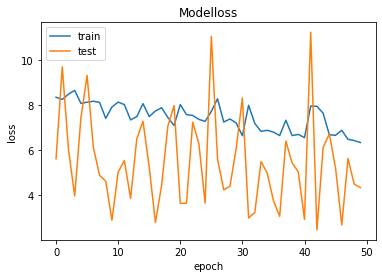

In [63]:
modelplot(mhist, 'loss', 'val_loss')

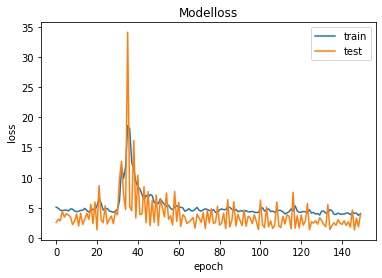

In [56]:
modelplot(vhist, 'loss', 'val_loss')

In [73]:
v_pred = vmodel.predict(seq_test)
m_pred = mmodel.predict(seq_test)

In [58]:
v_pred

array([[0.36998513],
       [0.37560534],
       [0.28743786],
       [0.43588564],
       [0.39975357],
       [0.51091075],
       [0.65112853],
       [0.73202294],
       [0.26063883],
       [0.8505673 ],
       [0.88528854],
       [0.20371279],
       [0.47934994],
       [0.2224521 ],
       [0.7907995 ],
       [0.7220412 ],
       [0.5966275 ],
       [0.29550445],
       [0.65731966],
       [0.38425034],
       [0.72491556],
       [0.19501844],
       [0.42516717],
       [0.63502395],
       [0.79322785],
       [0.42439267],
       [0.63620883],
       [0.50956666],
       [0.6649401 ],
       [0.3732317 ],
       [0.42017677],
       [0.76236504],
       [0.55839473],
       [0.38737044],
       [0.88170964],
       [0.51080424],
       [0.28500596],
       [0.29255092],
       [0.16289078],
       [0.47411162],
       [0.43999317],
       [0.570339  ],
       [0.7016129 ],
       [0.3193306 ],
       [0.3027181 ],
       [0.23923898],
       [0.19926317],
       [0.639

In [65]:
m_pred

array([[109.51434 ],
       [ 80.84825 ],
       [ 30.386576],
       [ 19.039152],
       [113.31972 ],
       [ 42.941277],
       [114.33435 ],
       [ 27.493612],
       [152.0466  ],
       [ 46.99978 ],
       [104.4328  ],
       [ 73.831696],
       [ 88.241646],
       [ 42.778763],
       [ 39.286366],
       [ 96.346634],
       [ 45.421223],
       [115.49985 ],
       [ 88.34001 ],
       [121.66683 ],
       [ 60.77557 ],
       [ 69.96955 ],
       [ 34.47701 ],
       [120.07034 ],
       [ 34.712368],
       [ 49.610287],
       [ 53.86935 ],
       [117.30214 ],
       [128.84608 ],
       [ 92.71797 ],
       [ 46.636078],
       [ 98.386185],
       [ 27.598719],
       [111.655136],
       [117.45439 ],
       [100.73245 ],
       [150.75595 ],
       [ 98.10213 ],
       [100.52458 ],
       [127.78387 ],
       [121.21544 ],
       [ 38.328857],
       [156.94478 ],
       [ 59.0344  ],
       [ 87.388695],
       [ 28.088602],
       [ 59.183018],
       [118.7

In [75]:
v_pred = v_pred.reshape([-1])
m_pred = m_pred.reshape([-1])

In [67]:
v_pred

array([0.36998513, 0.37560534, 0.28743786, 0.43588564, 0.39975357,
       0.51091075, 0.65112853, 0.73202294, 0.26063883, 0.8505673 ,
       0.88528854, 0.20371279, 0.47934994, 0.2224521 , 0.7907995 ,
       0.7220412 , 0.5966275 , 0.29550445, 0.65731966, 0.38425034,
       0.72491556, 0.19501844, 0.42516717, 0.63502395, 0.79322785,
       0.42439267, 0.63620883, 0.50956666, 0.6649401 , 0.3732317 ,
       0.42017677, 0.76236504, 0.55839473, 0.38737044, 0.88170964,
       0.51080424, 0.28500596, 0.29255092, 0.16289078, 0.47411162,
       0.43999317, 0.570339  , 0.7016129 , 0.3193306 , 0.3027181 ,
       0.23923898, 0.19926317, 0.63982284, 0.45734325, 0.1713076 ,
       0.29000762, 0.787139  , 0.19741903, 0.4006504 , 0.7651828 ,
       0.5643905 , 0.38178128, 0.5139442 , 0.7263754 , 0.5380308 ,
       0.23139402, 0.65187293, 0.8363608 , 0.56080467, 0.49967667,
       0.67467487, 0.4757772 , 0.40058348, 0.6237825 , 0.742918  ,
       0.4628708 , 0.19654082, 0.22192273, 0.63082474, 0.28255

In [76]:
mv_output = pd.DataFrame({'M':m_pred, 'V':v_pred})
mv_output

,M,V
0,109.514343,0.369985
1,80.848251,0.375605
2,30.386576,0.287438
3,19.039152,0.435886
4,113.319717,0.399754
...,...,...
695,138.270767,0.437463
696,84.099686,0.263445
697,96.966957,0.246935
698,132.060669,0.396489


In [77]:
mv_output.to_csv('mv_output.csv')